Text(0, 0.5, 'Survival')

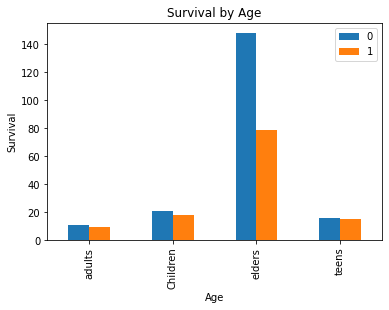

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

test_df=pd.read_csv(r'titanic\test.csv')
survivals=pd.read_csv(r'titanic\gender_submission.csv')
test_df["Survived"]=survivals["Survived"]
Children=test_df[ test_df['Age']<10]
elders=test_df[ test_df['Age']>50 ]
teens=test_df[ (test_df['Age']>10) & (test_df['Age']<20 )]
adults=test_df[ (test_df['Age']>20) &( test_df['Age']<50) ]
Children_groupby=Children.groupby('Survived').PassengerId.count()
elders_groupby=elders.groupby('Survived').PassengerId.count()
teens_groupby=teens.groupby('Survived').PassengerId.count()
adults_groupby=adults.groupby('Survived').PassengerId.count()
Final_df=pd.concat([Children_groupby,teens_groupby,adults_groupby,elders_groupby],axis=1,keys=['Children','teens','adults','elders'])
myset=set()
mydict={}
mydict[0]=[]
mydict[1]=[]

for key ,value in Final_df.to_dict().items():
    myset.add(key)
    for k,v in value.items():
        mydict[k].append(v)


myplot=pd.DataFrame(mydict,myset)
myplot.plot(kind='bar')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Survival')
